In [16]:
# PyTorch Regression Example
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.optim.lr_scheduler import ReduceLROnPlateau


In [2]:

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Generate synthetic data
def generate_data(n_samples=1000):
    X = np.random.uniform(-10, 10, (n_samples, 1))
    y = 2 * X + 3 + np.random.normal(0, 1, (n_samples, 1))
    return X, y

# Define the neural network
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.layer1 = nn.Linear(1, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)
        return x


In [3]:

# Data preparation
X, y = generate_data()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:

# Scale the features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test_scaled)

# Initialize model, loss function, and optimizer
model = RegressionModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [11]:

# Training loop
n_epochs = 100
batch_size = 32
n_batches = len(X_train_tensor) // batch_size
train_losses = []
test_losses = []

for epoch in range(n_epochs):
    model.train()
    epoch_loss = 0
    
    # Mini-batch training
    for i in range(n_batches):
        start_idx = i * batch_size
        end_idx = start_idx + batch_size
        
        batch_X = X_train_tensor[start_idx:end_idx]
        batch_y = y_train_tensor[start_idx:end_idx]
        
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    # Calculate average training loss
    avg_train_loss = epoch_loss / n_batches
    train_losses.append(avg_train_loss)
    
    # Calculate test loss
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        test_losses.append(test_loss.item())
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {test_loss:.4f}')


Epoch [10/100], Train Loss: 0.0080, Test Loss: 0.0068
Epoch [20/100], Train Loss: 0.0080, Test Loss: 0.0067
Epoch [30/100], Train Loss: 0.0080, Test Loss: 0.0067
Epoch [40/100], Train Loss: 0.0080, Test Loss: 0.0067
Epoch [50/100], Train Loss: 0.0080, Test Loss: 0.0067
Epoch [60/100], Train Loss: 0.0079, Test Loss: 0.0067
Epoch [70/100], Train Loss: 0.0079, Test Loss: 0.0067
Epoch [80/100], Train Loss: 0.0079, Test Loss: 0.0067
Epoch [90/100], Train Loss: 0.0079, Test Loss: 0.0067
Epoch [100/100], Train Loss: 0.0079, Test Loss: 0.0067


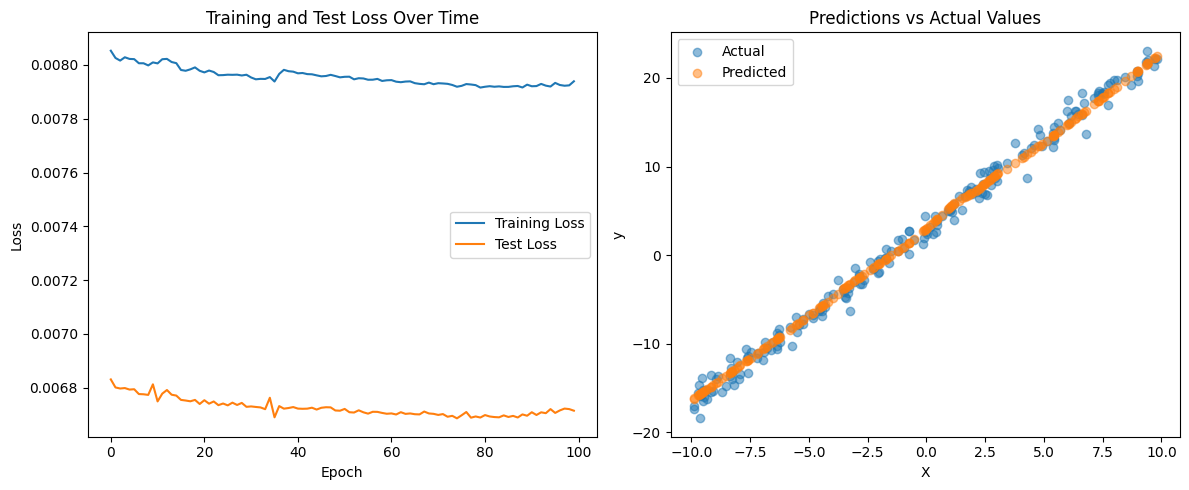

In [16]:

# Plotting results
%matplotlib inline
plt.figure(figsize=(12, 5))
plt.clf()  # Clear the current figure

# Plot 1: Training and Test Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Time')
plt.legend()

# Plot 2: Predictions vs Actual
plt.subplot(1, 2, 2)
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred = scaler_y.inverse_transform(y_pred.numpy())
    y_test_orig = scaler_y.inverse_transform(y_test_scaled)

plt.scatter(X_test, y_test_orig, label='Actual', alpha=0.5)
plt.scatter(X_test, y_pred, label='Predicted', alpha=0.5)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Predictions vs Actual Values')
plt.legend()

plt.tight_layout()
plt.show()
plt.close()  # Close the figure to free memory


In [17]:

# Calculate and print final metrics
from sklearn.metrics import mean_squared_error, r2_score

y_pred_orig = scaler_y.inverse_transform(model(X_test_tensor).detach().numpy())
mse = mean_squared_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)

print(f"\nFinal Metrics:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Final Metrics:
Mean Squared Error: 0.9184
R² Score: 0.9931


In [11]:

# Load and prepare the California Housing dataset
from sklearn.datasets import fetch_california_housing


In [3]:
def load_housing_data():
    housing = fetch_california_housing()
    X = housing.data
    y = housing.target.reshape(-1, 1)
    feature_names = housing.feature_names
    print("\nFeatures:", feature_names)
    print("Number of features:", len(feature_names))
    print("Number of samples:", X.shape[0])
    return X, y

In [4]:
# Define the neural network
class HouseRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(HouseRegressionModel, self).__init__()
        self.layer1 = nn.Linear(input_size, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        x = self.dropout(self.relu(self.layer1(x)))
        x = self.dropout(self.relu(self.layer2(x)))
        x = self.dropout(self.relu(self.layer3(x)))
        x = self.layer4(x)
        return x

In [5]:
# Data preparation
X, y = load_housing_data()



Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Number of features: 8
Number of samples: 20640


In [6]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test_scaled)


In [9]:

input_size = X.shape[1]  # Number of features in the dataset
# Initialize model, loss function, and optimizer

model = HouseRegressionModel(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
n_epochs = 100
batch_size = 32
n_batches = len(X_train_tensor) // batch_size
train_losses = []
test_losses = []


In [10]:
for epoch in range(n_epochs):
    model.train()
    epoch_loss = 0
    
    # Mini-batch training
    for i in range(n_batches):
        start_idx = i * batch_size
        end_idx = start_idx + batch_size
        
        batch_X = X_train_tensor[start_idx:end_idx]
        batch_y = y_train_tensor[start_idx:end_idx]
        
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    # Calculate average training loss
    avg_train_loss = epoch_loss / n_batches
    train_losses.append(avg_train_loss)
    
    # Calculate test loss
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        test_losses.append(test_loss.item())
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {test_loss:.4f}')


Epoch [10/100], Train Loss: 0.3117, Test Loss: 0.2516
Epoch [20/100], Train Loss: 0.2995, Test Loss: 0.2431
Epoch [30/100], Train Loss: 0.3021, Test Loss: 0.2331
Epoch [40/100], Train Loss: 0.3033, Test Loss: 0.2485
Epoch [50/100], Train Loss: 0.3228, Test Loss: 0.2575
Epoch [60/100], Train Loss: 0.3021, Test Loss: 0.2680
Epoch [70/100], Train Loss: 0.3128, Test Loss: 0.2331
Epoch [80/100], Train Loss: 0.3189, Test Loss: 0.2552
Epoch [90/100], Train Loss: 0.3093, Test Loss: 0.2658
Epoch [100/100], Train Loss: 0.3090, Test Loss: 0.2476


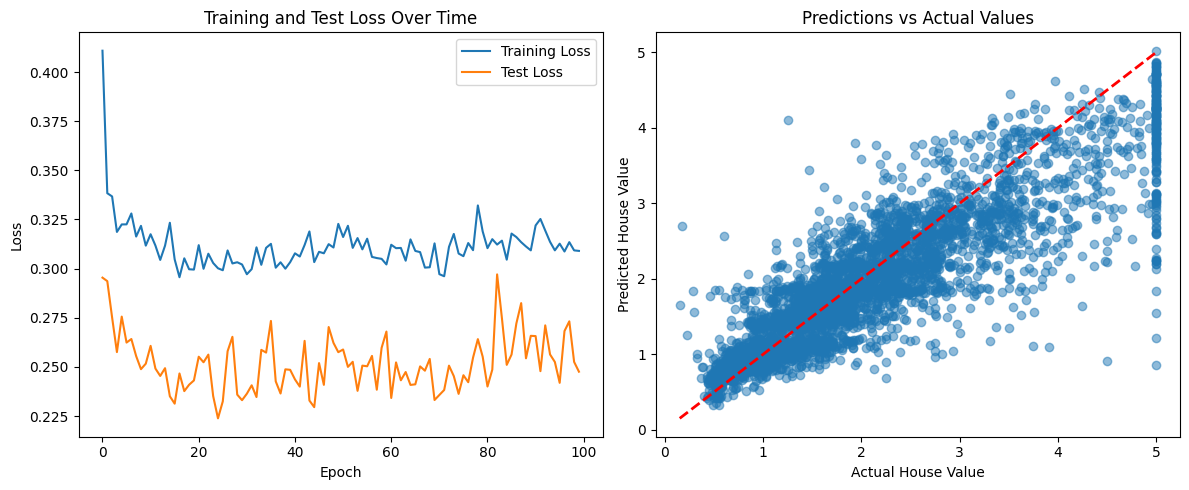

In [13]:

# Plotting results
plt.figure(figsize=(12, 5))

# Plot 1: Training and Test Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Time')
plt.legend()

# Plot 2: Predictions vs Actual
plt.subplot(1, 2, 2)
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred = scaler_y.inverse_transform(y_pred.numpy())
    y_test_orig = scaler_y.inverse_transform(y_test_scaled)


plt.scatter(y_test_orig, y_pred, alpha=0.5)
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--', lw=2)
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.title('Predictions vs Actual Values')


plt.tight_layout()
plt.show()


In [ ]:

# Calculate and print final metrics
from sklearn.metrics import mean_squared_error, r2_score

y_pred_orig = scaler_y.inverse_transform(model(X_test_tensor).detach().numpy())
mse = mean_squared_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)

print(f"\nFinal Metrics:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

In [24]:
class ImprovedHouseModel(nn.Module):
    def __init__(self, input_size):
        super(ImprovedHouseModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
        
                        
            nn.Linear(64, 32), 
            nn.BatchNorm1d(32),
            nn.ReLU(),
            
            nn.Linear(32, 1)
        )
        
    def forward(self, x):
        return self.model(x)


In [25]:
# Training parameters
input_size = X.shape[1]
model = ImprovedHouseModel(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) 
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.5)

# Increased batch size
batch_size = 32
n_epochs = 100  # Increased epochs
n_batches = len(X_train_tensor) // batch_size

train_losses = []
test_losses = []
best_test_loss = float('inf')
patience = 30
patience_counter = 0


In [26]:

for epoch in range(n_epochs):
    model.train()
    epoch_loss = 0
    
    # Mini-batch training
    for i in range(n_batches):
        start_idx = i * batch_size
        end_idx = start_idx + batch_size
        
        batch_X = X_train_tensor[start_idx:end_idx]
        batch_y = y_train_tensor[start_idx:end_idx]
        
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    # Calculate average training loss
    avg_train_loss = epoch_loss / n_batches
    train_losses.append(avg_train_loss)
    
    # Calculate test loss
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        test_losses.append(test_loss.item())
    
    # Learning rate scheduling
    scheduler.step(test_loss)
    
    # Early stopping check
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        patience_counter = 0
    else:
        patience_counter += 1
        
    if patience_counter >= patience:
        print(f'Early stopping at epoch {epoch+1}')
        break
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {test_loss:.4f}')


/home/jupyter-ian/myenv/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:243: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch [10/100], Train Loss: 0.2348, Test Loss: 0.2327
Epoch [20/100], Train Loss: 0.2064, Test Loss: 0.2363
Epoch [30/100], Train Loss: 0.1842, Test Loss: 0.2568
Epoch [40/100], Train Loss: 0.1656, Test Loss: 0.2753
Early stopping at epoch 43


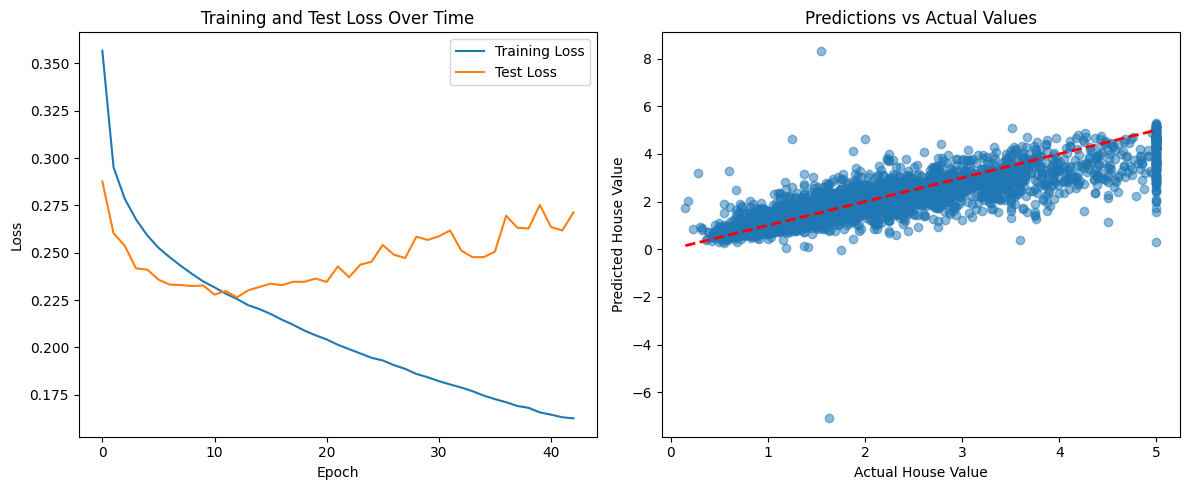

In [27]:

# Plotting results
plt.figure(figsize=(12, 5))

# Plot 1: Training and Test Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Time')
plt.legend()

# Plot 2: Predictions vs Actual
plt.subplot(1, 2, 2)
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred = scaler_y.inverse_transform(y_pred.numpy())
    y_test_orig = scaler_y.inverse_transform(y_test_scaled)


plt.scatter(y_test_orig, y_pred, alpha=0.5)
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--', lw=2)
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.title('Predictions vs Actual Values')


plt.tight_layout()
plt.show()


In [32]:
class SimpleHouseModel(nn.Module):
    def __init__(self, input_size):
        super(SimpleHouseModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),  # Added stronger dropout
            
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(32, 1)
        )
        
    def forward(self, x):
        return self.model(x)

# Training parameters
model = SimpleHouseModel(input_size)
optimizer = optim.Adam(model.parameters(), lr=0.0005)  # Reduced learning rate

In [33]:

# Load and preprocess data
X, y = load_housing_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test_scaled)

# Training parameters
input_size = X.shape[1]
model = SimpleHouseModel(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.5)

# Training settings
batch_size = 32
n_epochs = 100
n_batches = len(X_train_tensor) // batch_size
train_losses = []
test_losses = []
best_test_loss = float('inf')
patience = 30
patience_counter = 0




Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Number of features: 8
Number of samples: 20640


In [30]:
# Training loop
for epoch in range(n_epochs):
    model.train()
    epoch_loss = 0
    
    # Mini-batch training
    for i in range(n_batches):
        start_idx = i * batch_size
        end_idx = start_idx + batch_size
        
        batch_X = X_train_tensor[start_idx:end_idx]
        batch_y = y_train_tensor[start_idx:end_idx]
        
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    # Calculate average training loss
    avg_train_loss = epoch_loss / n_batches
    train_losses.append(avg_train_loss)
    
    # Calculate test loss
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        test_losses.append(test_loss.item())
    
    # Learning rate scheduling
    scheduler.step()
    
    # Early stopping check
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        patience_counter = 0
    else:
        patience_counter += 1
        
    if patience_counter >= patience:
        print(f'Early stopping at epoch {epoch+1}')
        break
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {test_loss:.4f}')



Epoch [10/100], Train Loss: 0.3413, Test Loss: 0.3038
Epoch [20/100], Train Loss: 0.3264, Test Loss: 0.2957
Epoch [30/100], Train Loss: 0.3188, Test Loss: 0.2943
Epoch [40/100], Train Loss: 0.3170, Test Loss: 0.2924
Epoch [50/100], Train Loss: 0.3128, Test Loss: 0.2838
Epoch [60/100], Train Loss: 0.3093, Test Loss: 0.2860
Epoch [70/100], Train Loss: 0.3061, Test Loss: 0.2790
Epoch [80/100], Train Loss: 0.3072, Test Loss: 0.2821
Epoch [90/100], Train Loss: 0.3095, Test Loss: 0.2847
Epoch [100/100], Train Loss: 0.3064, Test Loss: 0.2785


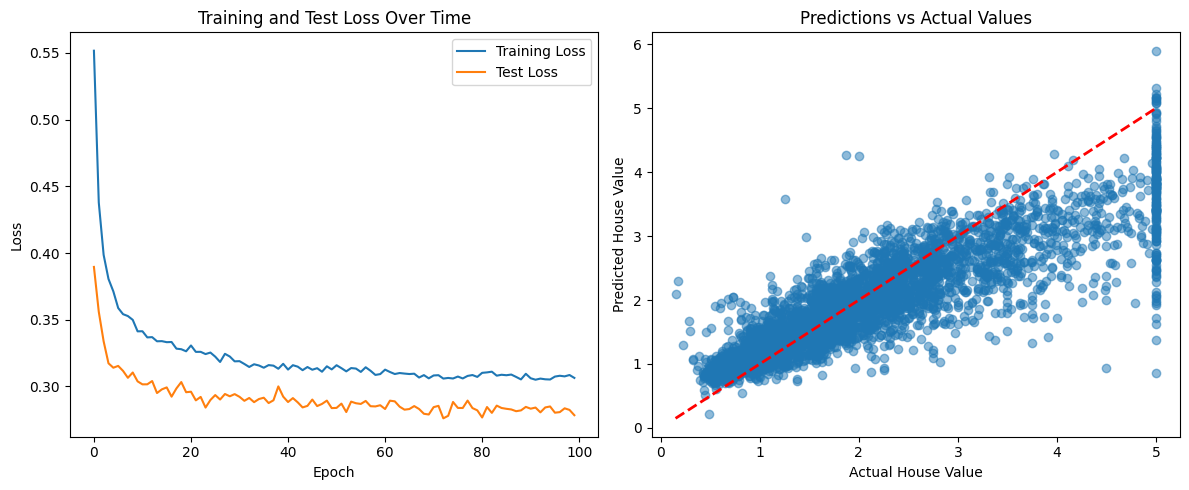


Final Metrics:
Mean Squared Error: 0.3723
R² Score: 0.7159


In [31]:
 #Plotting results
plt.figure(figsize=(12, 5))

# Plot 1: Training and Test Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Time')
plt.legend()

# Plot 2: Predictions vs Actual
plt.subplot(1, 2, 2)
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred = scaler_y.inverse_transform(y_pred.numpy())
    y_test_orig = scaler_y.inverse_transform(y_test_scaled)

plt.scatter(y_test_orig, y_pred, alpha=0.5)
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--', lw=2)
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.title('Predictions vs Actual Values')

plt.tight_layout()
plt.show()

# Calculate and print final metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test_orig, y_pred)
r2 = r2_score(y_test_orig, y_pred)

print(f"\nFinal Metrics:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")